In [27]:
from pandas import DataFrame 
import matplotlib.pyplot as plt 


import pandas as pd
data=pd.read_csv("pokemon.csv",sep=";", encoding="ANSI")


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 20 columns):
#                 842 non-null object
NAME_ENGLISH      842 non-null object
NAME_GERMAN       842 non-null object
NAME_FRENCH       842 non-null object
NAME_JAPAN        842 non-null object
NAME_KOREAN       842 non-null object
TYP1              842 non-null object
TYP2              429 non-null object
GENERATION        809 non-null float64
CANDY             231 non-null float64
BUDDY_DISTANCE    528 non-null float64
MAX_HP            528 non-null float64
MAX_ATT           528 non-null float64
MAX_DEF           528 non-null float64
MAX_CP            528 non-null float64
CATCH_RATE        517 non-null object
ESCAPE_RATE       518 non-null object
SHINY             528 non-null object
ICON_PATH         809 non-null object
SPRITE_PATH       508 non-null object
dtypes: float64(7), object(13)
memory usage: 131.6+ KB


In [29]:
data.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [31]:
#Identify how many types 1 types 2 are there?
type1=data['TYP1'].unique()


In [33]:
type2=data['TYP2'].unique()

In [34]:
print(type1)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon' 'Steel'
 'Flying']


In [35]:
print(type2)

['Poison' nan 'Flying' 'Normal' 'Psychic' 'Steel' 'Ground' 'Fairy' 'Grass'
 'Fighting' 'Electric' 'Ice' 'Dark' 'Dragon' 'Ghost' 'Rock' 'Water' 'Fire'
 'Bug']


In [46]:
from sklearn.linear_model import LinearRegression

x=data.iloc[:,11:14]
y=data.iloc[:,14]
x=x.dropna()
y=y.dropna()

In [47]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
model = regression.fit(x, y)


model.intercept_

-1297.6080094868864

In [48]:
model.coef_

array([ 4.64031022, 10.43250854,  5.26935569])

In [49]:
model.score(x,y)

0.9649749015950121

In [50]:
corr_mtx = x.corr()

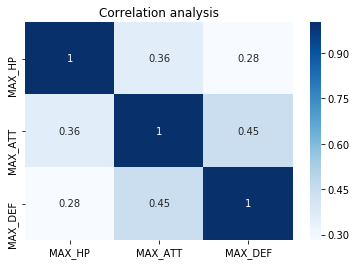

In [52]:
import seaborn as sns
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [54]:
z=data.iloc[:,11:15]


In [55]:
corr_mtx = z.corr()

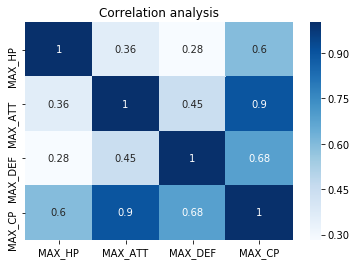

In [56]:
import seaborn as sns
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [57]:
from pandas import DataFrame 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 


import pandas as pd

In [62]:
z=z.dropna()

kmeans=KMeans(n_clusters=3).fit(z)

In [63]:
centroids= kmeans.cluster_centers_
print(centroids)

[[ 167.53846154  176.02403846  162.85576923 2097.80769231]
 [ 203.2952381   231.08571429  192.26666667 3203.62857143]
 [ 127.73953488  107.50697674  104.28372093  974.8372093 ]]


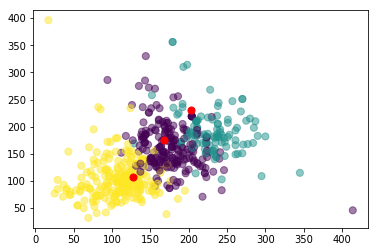

In [65]:
plt.scatter(z.iloc[:,1],z.iloc[:,2], c =kmeans.labels_.astype(float),s=50 , alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=50)

In [67]:

pred_y=kmeans.predict(z)




df2=pd.DataFrame(pred_y,columns=['groups'])
data['group K-mean'] = df2
display(data)


,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,...,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH,group K-mean
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,...,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png,2.0
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,...,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png,0.0
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,...,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png,1.0
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,...,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png,2.0
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,...,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png,0.0
5,6,Charizard,Glurak,Dracaufeu,Lizardon,Rijamong,Fire,Flying,1.0,NaN,...,186.0,223.0,173.0,2889.0,"5,00 %","5,00 %",Yes,./icon/006.png,./sprites/006.png,1.0
6,7,Squirtle,Schiggy,Carapuce,Zenigame,Kkobugi,Water,NaN,1.0,25.0,...,127.0,94.0,121.0,946.0,"20,00 %","10,00 %",Yes,./icon/007.png,./sprites/007.png,2.0
7,8,Wartortle,Schillok,Carabaffe,Kameil,Eonibugi,Water,NaN,1.0,100.0,...,153.0,126.0,155.0,1488.0,"10,00 %","7,00 %",Yes,./icon/008.png,./sprites/008.png,2.0
8,9,Blastoise,Turtok,Tortank,Kamex,Geobukwang,Water,NaN,1.0,NaN,...,188.0,171.0,207.0,2466.0,"5,00 %","5,00 %",Yes,./icon/009.png,./sprites/009.png,0.0
9,10,Caterpie,Raupy,Chenipan,Caterpie,Kaeteopi,Bug,NaN,1.0,12.0,...,128.0,55.0,55.0,437.0,"50,00 %","20,00 %",Yes,./icon/010.png,./sprites/010.png,2.0
